In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
cls=[]
for i in range(0,df.shape[0]):
    if df["Taxable.Income"][i]<= 30000:
        cls.append('Risky')
    else:
        cls.append('Good')
df['Class']=cls

In [4]:
df.tail(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
590,NO,Married,43018,85195,14,YES,Good
591,YES,Single,27394,132859,18,YES,Risky
592,YES,Single,68152,75143,16,NO,Good
593,NO,Divorced,84775,131963,10,YES,Good
594,NO,Married,47364,97526,9,YES,Good
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good
599,NO,Divorced,96519,158137,16,NO,Good


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Class            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [8]:
df.shape

(600, 7)

In [9]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [19]:
lblencoder=LabelEncoder()
df['Class']=lblencoder.fit_transform(df["Class"])
df['Undergrad']=lblencoder.fit_transform(df["Undergrad"])
df['Marital.Status']=lblencoder.fit_transform(df["Marital.Status"])
df['Urban']=lblencoder.fit_transform(df["Urban"])
df.head()


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [20]:
df1=df

In [21]:
df1.drop(['Taxable.Income'], axis=1, inplace= True)

KeyError: "['Taxable.Income'] not found in axis"

In [22]:
df1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [23]:
x=df1.iloc[:,:5]
y=df1.iloc[:,5]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

In [25]:
model = DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [26]:
y_pred= model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [27]:
ac(y_test,y_pred)

0.7722222222222223

[Text(226.6875, 489.24, 'City.Population <= 6.5\ngini = 0.331\nsamples = 420\nvalue = [332, 88]\nclass = Good'),
 Text(69.75, 380.52000000000004, 'Taxable.Income <= 75993.0\ngini = 0.233\nsamples = 67\nvalue = [58, 9]\nclass = Good'),
 Text(34.875, 271.8, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Good'),
 Text(104.625, 271.8, 'Taxable.Income <= 76669.5\ngini = 0.282\nsamples = 53\nvalue = [44, 9]\nclass = Good'),
 Text(69.75, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Risky'),
 Text(139.5, 163.08000000000004, 'Marital.Status <= 1.5\ngini = 0.26\nsamples = 52\nvalue = [44, 8]\nclass = Good'),
 Text(104.625, 54.360000000000014, 'gini = 0.342\nsamples = 32\nvalue = [25, 7]\nclass = Good'),
 Text(174.375, 54.360000000000014, 'gini = 0.095\nsamples = 20\nvalue = [19, 1]\nclass = Good'),
 Text(383.625, 380.52000000000004, 'Taxable.Income <= 149592.0\ngini = 0.347\nsamples = 353\nvalue = [274, 79]\nclass = Good'),
 Text(313.875, 271.8, 'Taxable.Income <= 1

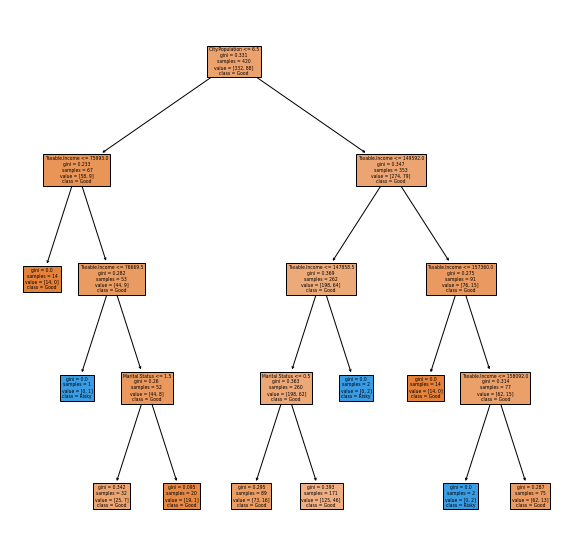

In [28]:
plt.figure(figsize=(10,10))
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn = ['Good','Risky']
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [29]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

0    175
1      5
dtype: int64

In [30]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [31]:
pd.crosstab(y_test,preds)

col_0,0,1
Class,,
0,139,5
1,36,0


In [34]:
np.mean(preds==y_test)

0.7722222222222223